# Predicting cab booking cancellation
## Capstone Project One : Springboard Data Science career track
### Notebook by Debisree Ray


## Introduction:

### 1. The Problem:

The business problem addressed here is to improve the customer service for Bangalore (India) based cab company called YourCabs. The problem is that a certain percentage of booking gets canceled by the company due to the unavailability of a car, and the cancellations occur at a time when the trip is about to start. Therefore it causes passengers inconvenience and a bad reputation for the company. So, the challenge is to build a predictive model, which would classify the upcoming bookings as, if they would eventually get cancelled due to car unavailability, or not. So this is a classification problem.


### 2. The Data: 

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. Here, I downloaded the data from the Kaggle website. Following are the data fields in the dataset, which we are going to read in the Pandas data frame.


* id - booking ID<br />
* user_id - the ID of the customer (based on mobile number)<br />
* vehicle_model_id - vehicle model type.<br />
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)<br />
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).<br />
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages <br />
* to_area_id - unique identifier of area. Applicable only for point-to-point travel <br />
* from_city_id - unique identifier of city <br />
* to_city_id - unique identifier of city (only for intercity) <br />
* from_date - time stamp of requested trip start <br />
* to_date - time stamp of trip end <br />
* online_booking - if booking was done on desktop website <br />
* mobile_site_booking - if booking was done on mobile website <br />
* booking_created - time stamp of booking <br />
* from_lat - latitude of from area <br />
* from_long - longitude of from area <br />
* to_lat - latitude of to area <br />
* to_long - longitude of to area <br />
* Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car. <br />
* Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units. <br />



### 3. The questions of interest:

This data analysis and story-telling report is organized around the following questions of interest:

* How many unique users are out there? Are there any returning customers? Did they (returning customers) got their rides canceled?
* What are the different package IDs out there? Is there any relationship with the cancellations?
* What are the different travel types, vehicle IDs and mode of bookings (mobile/website/phone)? How are they related with the cancellations?
* Is there any connection between the drop-off location/city/area ID/latitude-longitude info and cancellations? What about the same with the pick-up locations/city/area IDs
* In which areas/neighborhoods, the cab service is the most popular?
* what is the busiest hour in a day? Does that have any connection with the cancellation?
* Which day of the week is the most popular in the cab users? Is there any connection between the day of the week with the cancellations?


### 2. Import the necessary libraries and the data:



To start the EDA, here every different features have been studied and visually displayed against the 'cancellations', so as to infer any relationship between them. 

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe.

In [294]:
#os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [295]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

In [297]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [298]:
#summary statistics of the dataframe:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


So, we see that many of the columns (eg. 'package_id', 'to_area_id' etc.) have missing values.


In [299]:
## Let's split the dataframe in another group (for which the car_cancellation =1):

df1 = df[df['Car_Cancellation'] > 0]
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 21 to 43422
Data columns (total 20 columns):
id                     3132 non-null int64
user_id                3132 non-null int64
vehicle_model_id       3132 non-null int64
package_id             336 non-null float64
travel_type_id         3132 non-null int64
from_area_id           3130 non-null float64
to_area_id             2775 non-null float64
from_city_id           1691 non-null float64
to_city_id             21 non-null float64
from_date              3132 non-null datetime64[ns]
to_date                2135 non-null datetime64[ns]
online_booking         3132 non-null int64
mobile_site_booking    3132 non-null int64
booking_created        3132 non-null datetime64[ns]
from_lat               3130 non-null float64
from_long              3130 non-null float64
to_lat                 2775 non-null float64
to_long                2775 non-null float64
Car_Cancellation       3132 non-null int64
Cost_of_error          3132 non-

So, df1 is another dataframe for the canceled ('Car_cancellation' = 1) bookings. Total no of entries are 3132.

### 2.a) Class Imbalance:

Here, we see theat, there is major class imbalance in the data. Very few cancellations, as compared to the large amount of non-cancellations. Only ~7% (only 3132, in total 43,431) of the total booking has been canceled.

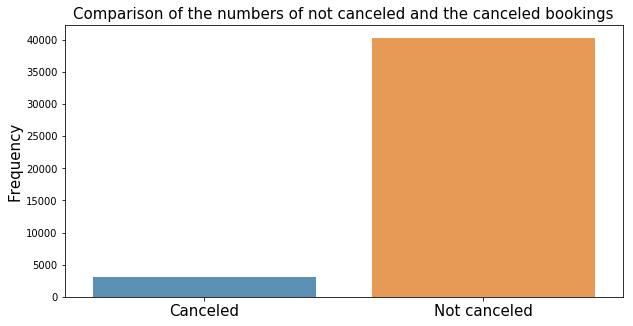

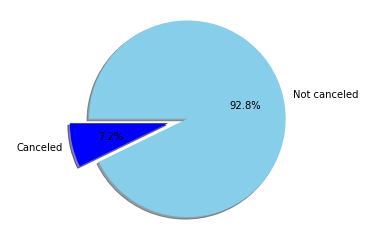

In [300]:
#find out the class (im)balance:

df.Car_Cancellation.value_counts()
cancel = df.Car_Cancellation.value_counts()
#print(cancel.values)


#Visual display for canceled vs. not canceled:

plt.figure(figsize=(10,5))
y = cancel.values
x= [1,0]
_= sns.barplot(x,y,alpha=0.8)
plt.title('Comparison of the numbers of not canceled and the canceled bookings',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks([1, 0], ['Not canceled','Canceled'],fontsize=15)
plt.savefig("1.png")
#plt.xlabel('', fontsize=12)
plt.show()



#pie plot showing the canceled vs. not canceled:

labels = 'Canceled','Not canceled'
sizes = [3132, 40299]
colors = ['blue', 'skyblue']
explode = (0.2, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.savefig("2.png")
plt.axis('equal')
plt.show()

### 2.b) User ID:

Each user has been assigned a unique ‘User ID’ in their booking informations. Total 22267 user IDs have been recorded. We can see that,the user with the user_id '29648' is the most frequent user, with frequency 471. So, there are some ‘returning customers’ and, some are the one-time users. The no. of one-time users (non returning) are: 15935 and that of the returning customers are: 6332.

There are some gaps/missing data in the user ID column. The most frequent user (user_ID no '29648') got the maximum cancellations too, 55 times! The next most unfortunate user got his/her rides canceled 25 times and so on. Notice, that to plot these, we have used the log scale so as to make the entire spectrum of the data clearly visible.
          
What we see is, that 1049 unfortunate returning customers got their rides canceled. Roughly 16.6% of the total returning customers got their rides canceled. So, 5283 returning customers did not undergo any booking cancellation experiences.


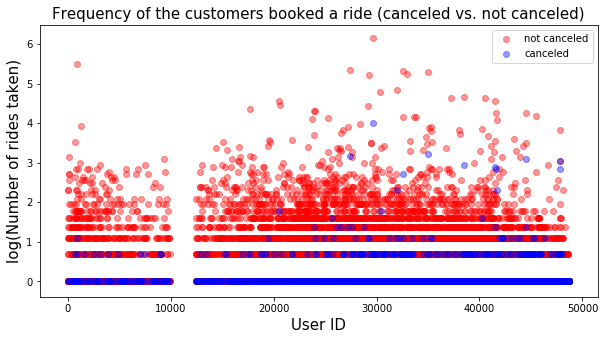

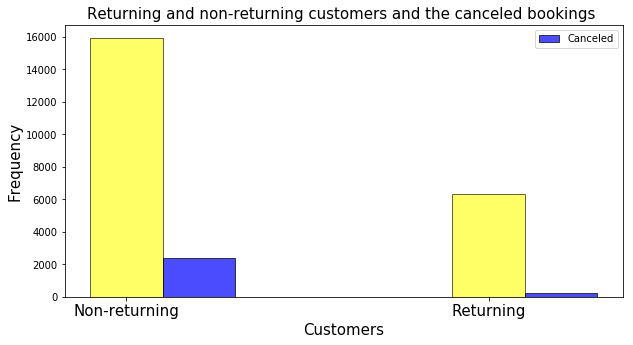

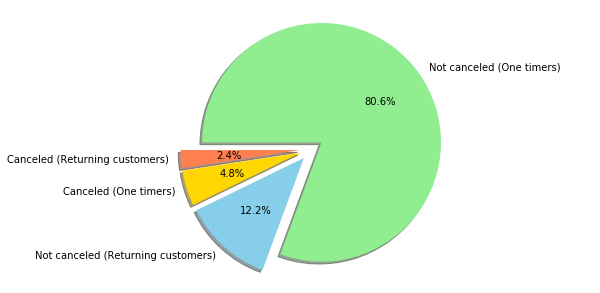

In [301]:
#Let's see how many users returned for the service
c=df.user_id.value_counts()
user_can=df1.user_id.value_counts()
#print(c)

#visual-1:
plt.figure(figsize=(10,5))
_=plt.scatter(x=c.index,y=np.log(c.values),alpha=0.4,color='r',label='not canceled')
_=plt.scatter(x=user_can.index,y=np.log(user_can.values),alpha=0.4,color='b',label='canceled')
plt.title('Frequency of the customers booked a ride (canceled vs. not canceled)',fontsize=15)
plt.ylabel('log(Number of rides taken)', fontsize=15)
plt.xlabel('User ID', fontsize=15)
plt.legend()
plt.savefig("3.png")
plt.show()

#Let's see how many customers are returning:

not_frequent= np.count_nonzero(c.values == 1)
not_freq_can= np.count_nonzero(user_can.values==1)
is_frequent = np.count_nonzero(c.values >1)
is_freq_can= np.count_nonzero(user_can.values >1)

#Let's see how many returning customers got their rides cancelled:
#freq_can=frequent_customers.index.intersection(user_can.index)

#Visual-2:

plt.figure(figsize=(10,5))
freq = [not_frequent, is_frequent]
freq_can= [not_freq_can,is_freq_can]
index=[0,1]
index_can=[0.2,1.2]
#index= ['non_returning','returning']
_=plt.bar(index,freq,alpha=0.6,width=0.2,color='yellow',edgecolor='k')
_=plt.bar(index_can,freq_can,alpha=0.7,width=0.2,label='Canceled',color='b',edgecolor='k')
plt.title('Returning and non-returning customers and the canceled bookings ',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Customers', fontsize=15)
plt.xticks([0, 1], ['Non-returning','Returning'],fontsize=15)
plt.savefig("4.png")
plt.legend()
plt.show()


#following user IDs are the returning customers:
frequent_customers = c.loc[c.values>1]
#print(frequent_customers.index)
#Let's see how many returning customers got their rides cancelled:
freq_can=frequent_customers.index.intersection(user_can.index)

#visual-3:
#pie plot showing the distribution:

plt.figure(figsize=(10,5))

labels = 'Canceled (Returning customers)','Canceled (One timers)','Not canceled (Returning customers)','Not canceled (One timers)'
sizes = [1049,2083,5283,35016]
colors = ['coral','gold', 'skyblue','lightgreen']
explode = (0.1,0.1,0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')
plt.savefig("5.png")
plt.show()

### 2.c) Package ID:

Different package IDs are the different travel (booking) plans, from which customers can choose theirs. We are trying to evaluate if the 'package_id' has much effect on the cancellation or not. So, we have plotted the frequency of the canceled vs.not canceled rides across the different package IDs.

what we see from the plot below is that, people mostly opt for a journey of 4hrs and around 40kms, followed by 8hrs and 80kms. (The descriptions of different package IDs have been given above, in the description of the data fields.) And most of the times package_ID no: '1' gets canceled.


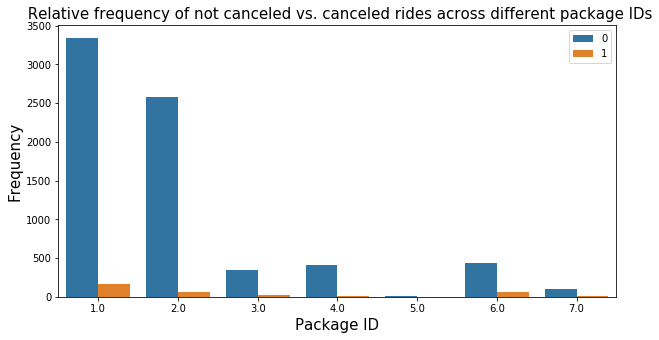

In [302]:
# Let's see the distribution of package_id
package=df.package_id.value_counts()
#print(package)
package_can=df1.package_id.value_counts()
#print(package_can.index)
#print(package_can.values)
#print(package.values)
#print(package.index)


#visual display


plt.figure(figsize=(10,5))
sns.countplot(x='package_id', hue='Car_Cancellation', data=df)
plt.title(' Relative frequency of not canceled vs. canceled rides across different package IDs',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Package ID', fontsize=15)
plt.savefig("6.png")
plt.legend()
plt.show()

### 2.d) Travel type ID:

Travel type IDs are another feature of similar kind. There are three different travel types (description of each type has been given in the data field) are available to choose. And from the following figure it’s evident that the travel type '2' ( i.e. for point to point travel ) is the most popular. 


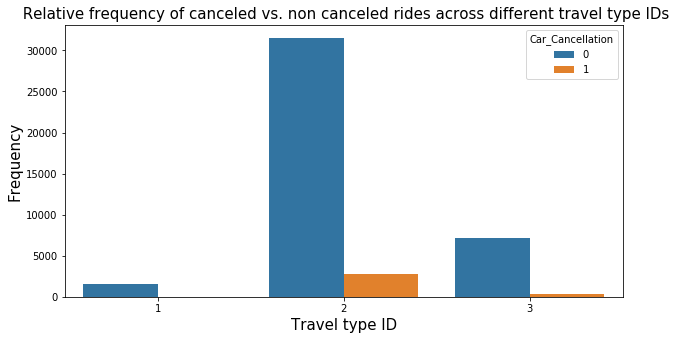

In [303]:
#Explore the distributions of different travel types:
travel = df.travel_type_id.value_counts()
#print(travel.values)
#print(travel.index)
tt= df1.travel_type_id.value_counts()
#print(tt.values)
#print(tt.index)

#Visually:

plt.figure(figsize=(10,5))
sns.countplot(x='travel_type_id', hue='Car_Cancellation', data=df)
plt.title(' Relative frequency of canceled vs. non canceled rides across different travel type IDs',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Travel type ID', fontsize=15)
plt.savefig("7.png")
plt.show()

### 2.e) Vehicle model:

Another feature listed in the dataset is the ‘vehicle ID’. 27 different types of vehicles have been listed. The most popular one is the vehicle with the vehicle ID no '12'. It has been used 31859 times. At the same time we see that the vehicle ID no '12' got the maximum number of cancellations (2668 times). 

Notice. that the Y-axis have been resized by using logarithmic operation, to get a clear picture of the entire data. 


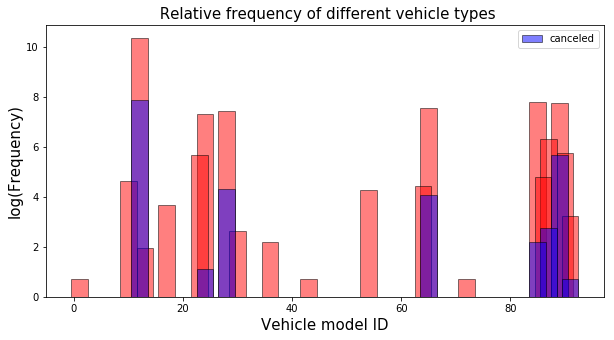

In [304]:
#Let's see different vehicle model type
vehicle=df.vehicle_model_id.value_counts()
vv=df1.vehicle_model_id.value_counts()
#print(vehicle.index)
#print(vehicle.values)
#print(vv.index)
#print(vv.values)


#visually
plt.figure(figsize=(10,5))
_=plt.bar(vehicle.index,np.log(vehicle.values),alpha=0.5,color='r',edgecolor='k',width=3)
_=plt.bar(vv.index,np.log(vv.values),alpha=0.5,color='b',edgecolor='k',width=3,label='canceled')
plt.title(' Relative frequency of different vehicle types',fontsize=15)
plt.ylabel('log(Frequency)', fontsize=15)
plt.xlabel('Vehicle model ID', fontsize=15)
plt.legend()
plt.savefig("8.png")
plt.show()

### 2.f) Different means of booking:

There are three different types of ‘Booking methods’. Only two types were listed such as, 'mobile booking' and 'desktop/website booking'. So, I concluded the remaining portion of the booking information as ‘other method’ of booking. We see that, 1878 bookings have been done from the mobile websites, 15270 bookings from the desktop websites, so, 26283 bookings have been done differently! (Total no. of bookings=43431) So, the other methods of booking are mostly popular. though, nothing has been stated about that.

In the same figure we have shown the same plot for the canceled bookings (with deeper shades). Interestingly, this time the maximum frequency of cancellations correspond to the bookings done from the desktop websites.


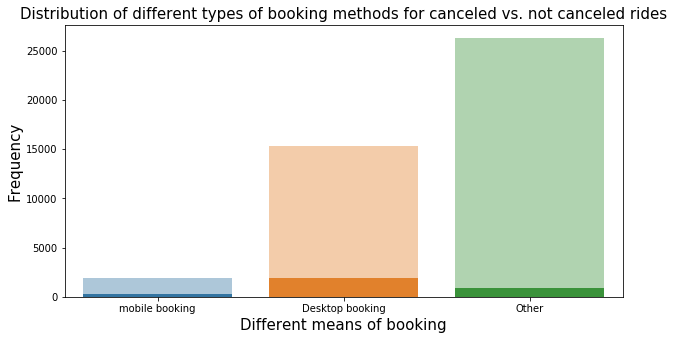

In [305]:
#Exploring the different ways of booking:
mobile= df.mobile_site_booking.value_counts()
mobile_can=df1.mobile_site_booking.value_counts()
#print(mobile.values)
#print(mobile.index)
#print(mobile_can.values)
#print(mobile_can.index)

online= df.online_booking.value_counts()
online_can=df1.online_booking.value_counts()
#print(online.values)
#print(online.index)
#print(online_can.values)
#print(online_can.index)

x= ['mobile booking','Desktop booking','Other']
y=[1878,15270,26283]
y_can=[289,1903,940]
plt.figure(figsize=(10,5))
_=sns.barplot(x,y,alpha=0.4)
_=sns.barplot(x,y_can,alpha=1)
plt.title('Distribution of different types of booking methods for canceled vs. not canceled rides',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig("9.png")
plt.xlabel('Different means of booking', fontsize=15)
plt.show()

### 2.g) Pick-up/Drop-off area information:

There is one feature describing the drop-off and pick-up area IDs. 598 unique origin and 568 destination area informations have been listed. The most popular origin area is the area with area_id no. '393', which is eventually the most popular destination area as well. 559 area IDs are common to both as the pick-up and drop-off locations. The violin-plots show both the pick-up and drop-off area distributions.


This feature has some interesting connection with the cancellations. There are certain pick-up and drop-off areas for which more than 50% of the bookings were canceled (See below tables).  And some routes (from certain pick-up to certain drop-off areas), for which more than 90% of bookings were canceled.

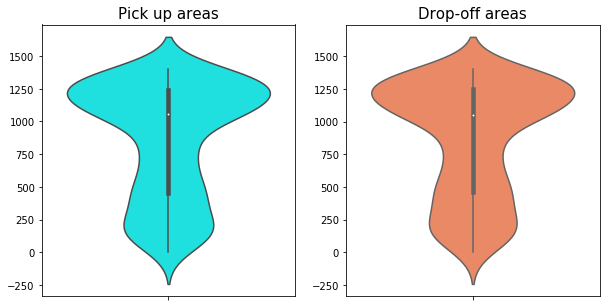

In [306]:
#Let's explore the area information

from_area=df.from_area_id.value_counts()
#print(from_area.index)
#print(from_area.values)

to_area= df.to_area_id.value_counts()
#print(to_area.index)
#print(to_area.values)

#Common between the two areas:
comm_area=set(df['from_area_id']).intersection(set(df['to_area_id']))
comm_area_list=list(comm_area)
#print(len(comm_area))

#Visually: Violinplot

plt.figure(figsize=(10,5))
plt.subplot(121)
ax1= sns.violinplot(from_area.index,color='cyan',orient='v')
plt.title('Pick up areas',fontsize=15)
plt.subplot(122)
ax2=sns.violinplot(to_area.index,color='coral',orient='v')
plt.title('Drop-off areas',fontsize=15)
plt.savefig("10.png")
plt.show()

from_area_id
130.0     80.000000
1148.0    66.666667
1174.0    66.666667
630.0     66.666667
176.0     52.830189
1381.0    50.000000
1160.0    50.000000
1100.0    50.000000
1385.0    50.000000
1276.0    45.454545
Name: from_area_percent_canceled, dtype: float64
to_area_id
1247.0    75.000000
677.0     66.666667
355.0     66.666667
1218.0    60.000000
845.0     60.000000
1310.0    50.000000
1311.0    50.000000
1387.0    50.000000
1197.0    50.000000
1225.0    50.000000
Name: to_area_percent_canceled, dtype: float64


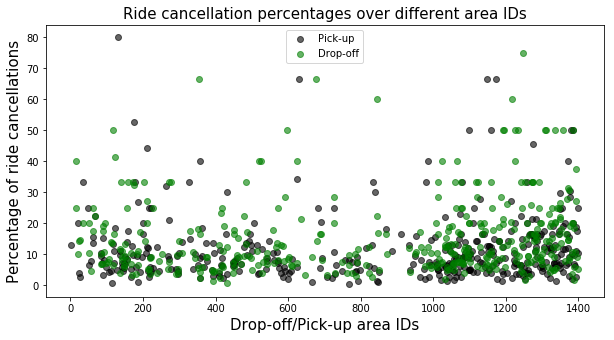

In [307]:
#Lets see if there is any relationship between the pickup area with car cancellation:

from_area_can = df.groupby(['from_area_id', 'Car_Cancellation']).size().unstack(1)
#from_area_can.head(10)
from_area_can['from_area_percent_canceled'] = (from_area_can[1] / (from_area_can[1] + from_area_can[0])) * 100
from_area_max_can= from_area_can.from_area_percent_canceled.sort_values(ascending=False).iloc[:500]
from_area_max_can_small= from_area_can.from_area_percent_canceled.sort_values(ascending=False).iloc[:10]
print(from_area_max_can_small)

#Similar operation with the drop-off area:

to_area_can= df.groupby(['to_area_id','Car_Cancellation']).size().unstack(1)
#to_area_can.head(10)
to_area_can['to_area_percent_canceled'] = (to_area_can[1] / (to_area_can[1] + to_area_can[0])) * 100
to_area_max_can= to_area_can.to_area_percent_canceled.sort_values(ascending=False).iloc[:500]
to_area_max_can_small= to_area_can.to_area_percent_canceled.sort_values(ascending=False).iloc[:10]
print(to_area_max_can_small)


#Visually:
plt.figure(figsize=(10,5))
_=plt.plot(from_area_max_can,marker='o',linestyle='none',color= 'k',label='Pick-up',alpha=0.6)
_=plt.plot(to_area_max_can,marker='o',linestyle='none',color='g',label='Drop-off',alpha=0.6)
plt.xlabel('Drop-off/Pick-up area IDs',fontsize=15)
plt.ylabel('Percentage of ride cancellations',fontsize=15)
plt.title('Ride cancellation percentages over different area IDs',fontsize=15)
plt.legend()
plt.show()

In [308]:
#Now explore the routes and the cancellations:

from_to_can = df.groupby(['from_area_id', 'to_area_id', 'Car_Cancellation']).size().unstack(2)
#from_to_can.head(10)
from_to_can['from_to_percent_cancelled'] = (from_to_can[1] / (from_to_can[0] + from_to_can[1])) * 100
from_to_route_max_can=from_to_can.from_to_percent_cancelled.sort_values(ascending=False).iloc[:10]
print(from_to_route_max_can)

from_area_id  to_area_id
626.0         122.0         90.909091
1349.0        1052.0        83.333333
1330.0        176.0         80.000000
1052.0        1349.0        78.571429
625.0         452.0         75.000000
1296.0        793.0         75.000000
1365.0        293.0         75.000000
1285.0        61.0          70.588235
122.0         626.0         70.000000
176.0         136.0         66.666667
Name: from_to_percent_cancelled, dtype: float64


So, this is very interesting to see that some routes are very popular in terms of cancellations ; the cancellation rate for them is pretty high. As an example, the route from area ID: 626 to area ID: 122, almost 91% of the bookings were cancelled. 

### 2.h) city ID:

Another similar information have been listed in the feature called ‘city ID’. we can see that only 3 origin cities have been recorded. The most popular origin city is the city with the ID no: '15'. Where as, the destination cities are much distributed in numbers. 116 unique destination cities are there. The most popular destination city is the city with the ID no: '32' (475 rides have their destinations to this city.)
However, we need to remember that, only 16345 non-null values are available in 'from_city_id' information and 1588 non-null values are available in 'to_city_id' information. So, most of the information is missing.


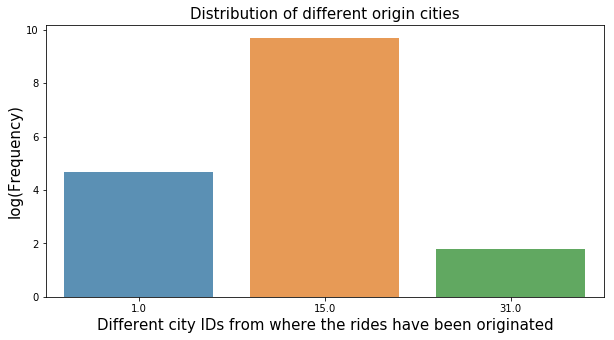

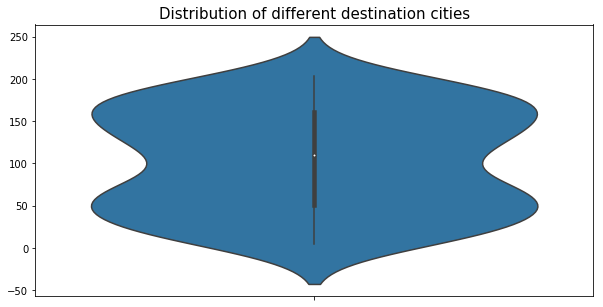

In [309]:
#Let's examine the cities:

from_city=df.from_city_id.value_counts()
#print(from_city.index)
#print(from_city.values)
to_city=df.to_city_id.value_counts()
#print(to_city.index)
#print(to_city.values)

#Visual representation
plt.figure(figsize=(10,5))
_=sns.barplot(from_city.index,np.log(from_city.values),alpha=0.8)
plt.title('Distribution of different origin cities',fontsize=15)
plt.ylabel('log(Frequency)', fontsize=15)
plt.xlabel('Different city IDs from where the rides have been originated', fontsize=15)
plt.savefig("11.png")
plt.show()

plt.figure(figsize=(10,5))
plt.title('Distribution of different destination cities',fontsize=15)
_= sns.violinplot(to_city.index,orient='v')
plt.savefig("12.png")
plt.show()

### 2.i) Latitude-longitude information:

 Another GPS information about the pick-up and drop-off area locations are given in the form of latitude-longitude coordinates.  again we see that, there are certain areas (latitude-longitude combination), for which the pick-up/drop-off cancellations are high (more than 50%).


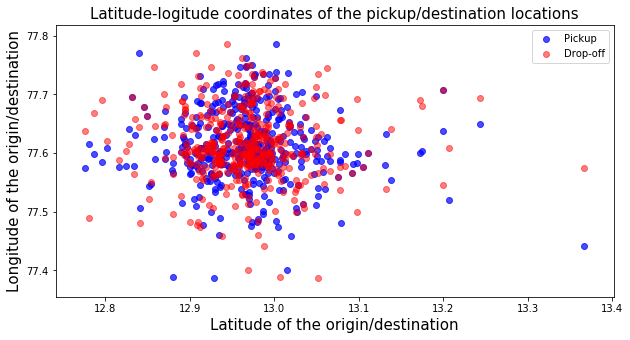

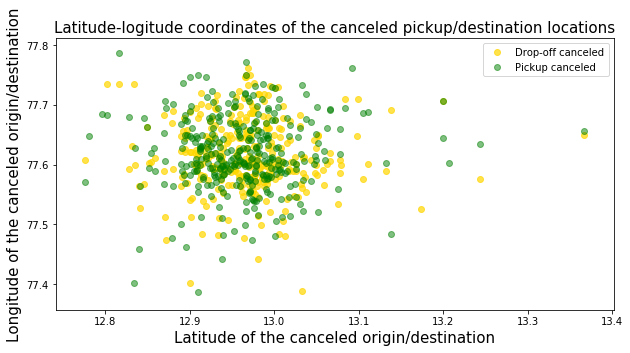

In [310]:
#Latitute-Longitude info and the cancellation:

#From_Lat
f_lat=df.from_lat.value_counts()
f_lat_can=df1.from_lat.value_counts()
f_lat_can_n=f_lat_can.index[:334,]
f_lat_n=f_lat.index[:462,]
#print(len(f_lat_can_n.values))

#From_Long
#f= from_area.index[:10,]
f_long=df.from_long.value_counts()
f_long_can=df1.from_long.value_counts()
#print(len(f_long_can.values))

#To_Lat
t_lat=df.to_lat.value_counts()
t_lat_n=t_lat.index[:447,]
t_lat_can=df1.to_lat.value_counts()
t_lat_can_n=t_lat_can.index[:336,]
#print(len(t_lat_can_n.values))

#To_Long
t_long=df.to_long.value_counts()
t_long_can=df1.to_long.value_counts()
#print(len(t_long_can.values))


#visually:
plt.figure(figsize=(10,5))
_=plt.scatter(x=f_lat_n,y=f_long.index,alpha=0.7,color='blue',label='Pickup')
_=plt.scatter(x=t_lat_n,y=t_long.index,alpha=0.5,color='r',label='Drop-off')

plt.title('Latitude-logitude coordinates of the pickup/destination locations',fontsize=15)
plt.ylabel('Longitude of the origin/destination', fontsize=15)
plt.xlabel('Latitude of the origin/destination', fontsize=15)
plt.legend()
plt.savefig("13.png")
plt.show()

plt.figure(figsize=(10,5))
_=plt.scatter(x=t_lat_can_n,y=t_long_can.index,alpha=0.7,color='gold',label='Drop-off canceled')
_=plt.scatter(x=f_lat_can_n,y=f_long_can.index,alpha=0.5,color='g',label='Pickup canceled')
plt.title('Latitude-logitude coordinates of the canceled pickup/destination locations',fontsize=15)
plt.ylabel('Longitude of the canceled origin/destination', fontsize=15)
plt.xlabel('Latitude of the canceled origin/destination', fontsize=15)
plt.legend()
plt.savefig("14.png")
plt.show()

In [311]:
#Latitude-longitude combo for maximum cancellations:

from_LL_can = df.groupby(['from_lat', 'from_long', 'Car_Cancellation']).size().unstack(2)
#from_LL_can.head(10)
from_LL_can['percent_cancelled_from_LL'] = (from_LL_can[1] / (from_LL_can[0] + from_LL_can[1])) * 100
from_LL_max_can=from_LL_can.percent_cancelled_from_LL.sort_values(ascending=False).iloc[:10]
#print(from_LL_max_can)


to_LL_can = df.groupby(['to_lat', 'to_long', 'Car_Cancellation']).size().unstack(2)
#from_LL_can.head(10)
to_LL_can['percent_cancelled_to_LL'] = (to_LL_can[1] / (to_LL_can[0] + to_LL_can[1])) * 100
to_LL_max_can=to_LL_can.percent_cancelled_to_LL.sort_values(ascending=False).iloc[:10]
print(to_LL_max_can)

to_lat     to_long  
12.975390  77.548048    66.666667
12.980360  77.579940    60.000000
12.932229  77.690567    50.000000
12.956163  77.734160    50.000000
12.916941  77.589051    50.000000
12.980470  77.483730    50.000000
12.974967  77.614915    50.000000
12.988325  77.594263    50.000000
12.996820  77.604360    41.463415
12.934312  77.601508    40.000000
Name: percent_cancelled_to_LL, dtype: float64


### 2.j) Booking time:

There is one feature column, which records the timestamp of when the ride has been booked.  We see that, Maximum no. of bookings made at a given timestamp is, 18. And the corresponding date-time is: 2013-10-31 10:30:00. We can extract the day/month/time etc. date-time information from the booking timestamp. 

* Here we have plotted the booking frequencies over the days of the week. And on the same graph, we have shown the canceled ones. We can see that the maximum bookings were done on Fridays. 

* Next we have plotted the booking frequencies over the dates through a month. And we have projected the same for the canceled ones on the same figure. We see that the bookings were done almost equally throughout the month.

* Lastly, we have plotted the booking frequencies over the months through an year. We see, that the maximum bookings were done in the month of August.


Maximum booking created at a given timestamp:18
And the corresponding date-time is: 2013-10-31 10:30:00
Minimum booking created at a given timestamp:1


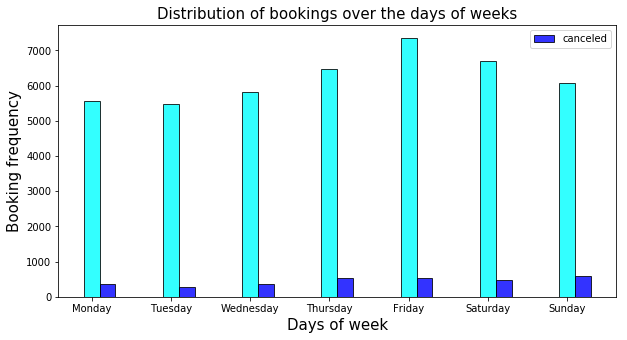

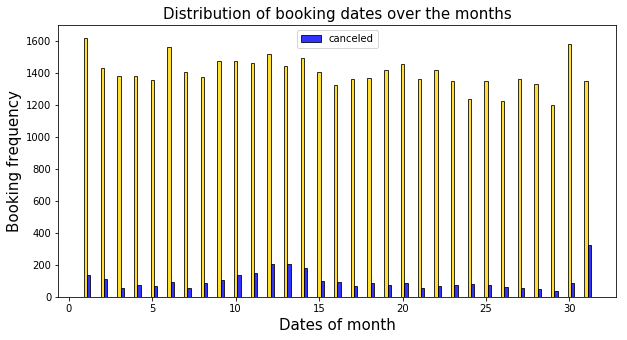

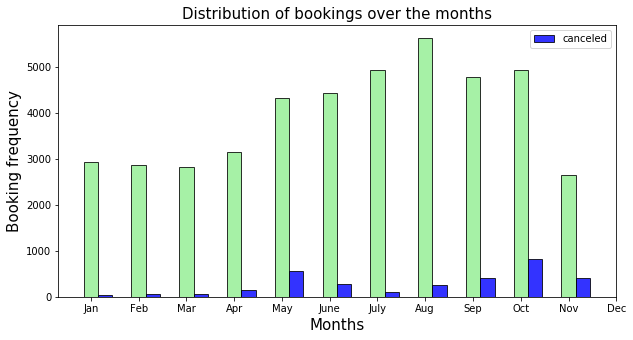

In [312]:
#Booking time:

time=df.booking_created.value_counts()
t=df.booking_created
t_can=df1.booking_created
time_can= df1.booking_created.value_counts()
#print(time_can)

max=time.values.max()
min=time.values.min()



#t=time.loc[time.values == max]

print('Maximum booking created at a given timestamp:'+ str(max))
print('And the corresponding date-time is: 2013-10-31 10:30:00')
print('Minimum booking created at a given timestamp:'+str(min))

import datetime

df['booking_dayofweek'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df['booking_date'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df['booking_month'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df['booking_time'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time

df1['booking_dayofweek_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df1['booking_date_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df1['booking_month_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df1['booking_time_can'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time


booking_dayofweek=df.booking_dayofweek.value_counts()
booking_date=df.booking_date.value_counts()
booking_m=df.booking_month.value_counts()
booking_t=df.booking_time.value_counts()

booking_dayofweek_can=df1.booking_dayofweek_can.value_counts()
booking_date_can=df1.booking_date_can.value_counts()
booking_m_can=df1.booking_month_can.value_counts()
booking_t_can=df1.booking_time_can.value_counts()


#visually:

#Visually days over the week:
plt.figure(figsize=(10, 5))
_=plt.bar(booking_dayofweek.index,booking_dayofweek.values,width=0.2,color='cyan',edgecolor='k',alpha=0.8)
_=plt.bar(booking_dayofweek_can.index+0.2,booking_dayofweek_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Days of week',fontsize=15)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.ylabel('Booking frequency',fontsize=15)
plt.title('Distribution of bookings over the days of weeks',fontsize=15)
plt.legend()
plt.savefig("15.png")
plt.show()

#Visually dates over the month:
plt.figure(figsize=(10, 5))
_=plt.bar(booking_date.index,booking_date.values,width=0.2,color='gold',edgecolor='k',alpha=0.8)
_=plt.bar(booking_date_can.index+0.2,booking_date_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Dates of month',fontsize=15)
#plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.ylabel('Booking frequency',fontsize=15)
plt.title('Distribution of booking dates over the months',fontsize=15)
plt.legend()
plt.savefig("15a.png")
plt.show()

#Visually months over the year:
plt.figure(figsize=(10, 5))
_=plt.bar(booking_m.index,booking_m.values,width=0.3,color='lightgreen',edgecolor='k',alpha=0.8)
_=plt.bar(booking_m_can.index+0.3,booking_m_can.values,width=0.3,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Booking frequency',fontsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Distribution of bookings over the months',fontsize=15)
plt.legend()
plt.savefig("16.png")
plt.show()

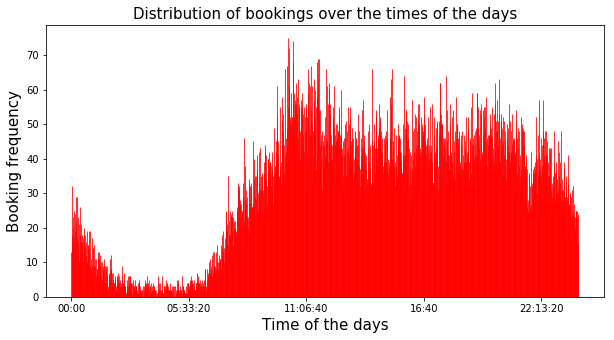

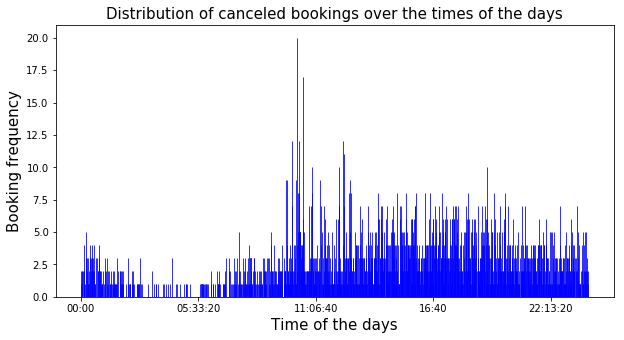

In [313]:
#Visually time of the day 
plt.figure(figsize=(10, 5))
_=plt.bar(booking_t.index,booking_t.values,color='g',alpha=0.8,width=0.2,edgecolor='r')
#_=plt.bar(t_can.index,t_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Time of the days',fontsize=15)
#plt.xticks(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Booking frequency',fontsize=15)
plt.title('Distribution of bookings over the times of the days',fontsize=15)
#plt.legend()
plt.savefig("17.png")
plt.show()


#Visually time of the day for canceled:
plt.figure(figsize=(10, 5))
_=plt.bar(booking_t_can.index,booking_t_can.values,color='g',alpha=0.8,width=0.2,edgecolor='b')
#_=plt.bar(t_can.index,t_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Time of the days',fontsize=15)
#plt.xticks(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Booking frequency',fontsize=15)
plt.title('Distribution of canceled bookings over the times of the days',fontsize=15)
#plt.legend()
plt.savefig("18.png")
plt.show()


### 2.k) Timestamp of the actual ride:

This is one of the most important features in the dataset, which might show some connection with the cancellation. This column records the timestamp of the actual rides. We see that
the maximum no. of trips started at a given timestamp is, 20 and the corresponding date-time is: 2013-10-12 06:00:00 and 2013-07-04 22:15:00.

In [314]:
date=df.from_date.value_counts()
date_can=df1.from_date.value_counts()
#print(date_can)
d=df.from_date
d_can=df1.from_date
max_d=date.values.max()
min_d=date.values.min()

In [315]:
d_can.describe()

count                    3132
unique                   2377
top       2013-05-12 07:30:00
freq                       11
first     2013-01-01 18:30:00
last      2013-11-30 18:30:00
Name: from_date, dtype: object

### 2.k.1)  Splitting the timestamp (of the actual trip starting) into date and time:

Here we have extracted the ride frequencies over the days of the week. It seems they are almost equally distributed. We see that the maximum frequency (6990) of rides correspond to day no '5', ie Saturday', followed by the day no '4', which is the 'friday'. So, people book cabs more in the weekends. On the same figure we have plotted the canceled ride frequencies. And they seem to appear equally distributed over the days of the week. However, the maximum cancellations(578) correspond to the day no '4', which is 'friday', followed by the day no '6', which is 'sunday'.


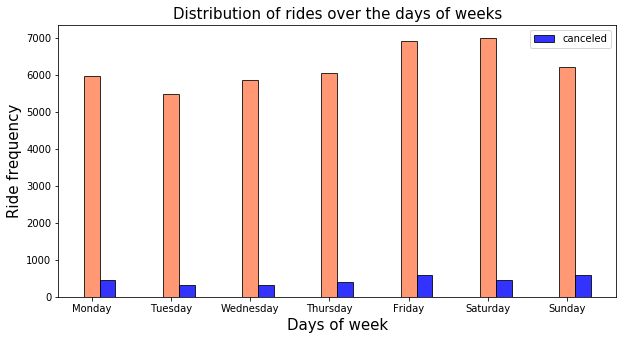

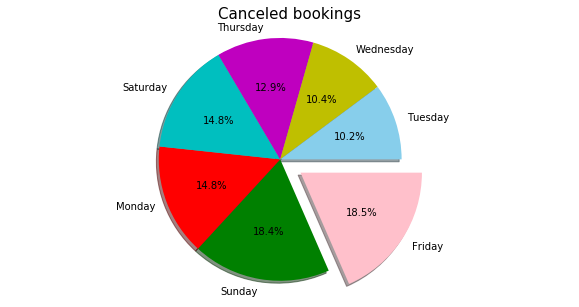

In [316]:
#Splitting the trip starting time info into two seperate columns, date and time:
#To see if that has any connection with the cancellations:

#pd.__version__
import datetime

df['dayofweek'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df['date'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df['month'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df['time'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time

df1['dayofweek_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df1['date_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df1['month_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df1['time_can'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time


weekday=df.dayofweek.value_counts()
date=df.date.value_counts()
month=df.month.value_counts()
t=df.time.value_counts()

weekday_can=df1.dayofweek_can.value_counts()
date_can=df1.date_can.value_counts()
month_can=df1.month_can.value_counts()
t_can=df1.time_can.value_counts()
#print(month_can)

#Visually days over the week:
plt.figure(figsize=(10, 5))
_=plt.bar(weekday.index,weekday.values,width=0.2,color='coral',edgecolor='k',alpha=0.8)
_=plt.bar(weekday_can.index+0.2,weekday_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Days of week',fontsize=15)
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.ylabel('Ride frequency',fontsize=15)
plt.title('Distribution of rides over the days of weeks',fontsize=15)
plt.legend()
plt.savefig("19.png")
plt.show()

#visual-a:
#pie plot showing the distribution:

plt.figure(figsize=(10,5))
values = weekday_can.values
colors = ['pink', 'g', 'r', 'c', 'm', 'y','skyblue']
labels = ['Friday', 'Sunday', 'Monday', 'Saturday', 'Thursday', 'Wednesday','Tuesday']
explode = (0.2, 0, 0, 0, 0, 0,0)
plt.pie(values, colors=colors, labels= labels,explode=explode,counterclock=False, autopct='%1.1f%%',shadow=True)
plt.title('Canceled bookings',fontsize=15)
#plt.legend(labels,loc=3)
plt.axis('equal')
plt.savefig("19a.png")
plt.show()

### 2.k.2) Distribution of the rides through dates of a month:

Here we have extracted the ride frequencies of the month. We see that the rides are almost equally distributed over the dates, however little declined towards the end. On the same graph we have projected the same for the canceled ones.

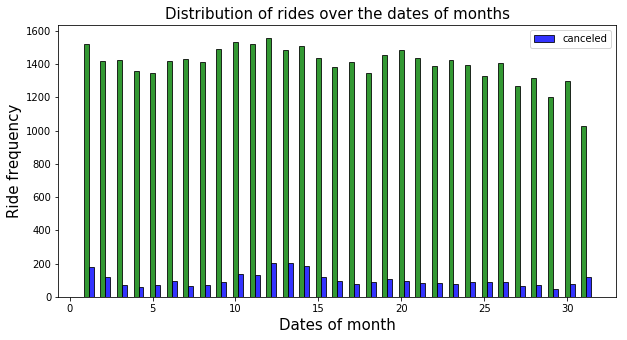

In [317]:
#Visually months over the year:
plt.figure(figsize=(10, 5))
_=plt.bar(date.index,date.values,width=0.3,color='g',edgecolor='k',alpha=0.8)
_=plt.bar(date_can.index+0.3,date_can.values,width=0.3,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Dates of month',fontsize=15)
plt.ylabel('Ride frequency',fontsize=15)
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Distribution of rides over the dates of months',fontsize=15)
plt.legend()
plt.savefig("21.png")
plt.show()

### 2.k.3) Distribution of the rides through months in a year:

Here we have extracted the ride frequency over the months of the year. We see that the maximum frequency (5445) corresponds to the month no '8', which is the month of 'August', followed by 'July'. 

On the same figure we have plotted the canceled ride friequencies. Maximum cancellation (650) correspond to the month no '10', which is 'October', followed by 'November'. 

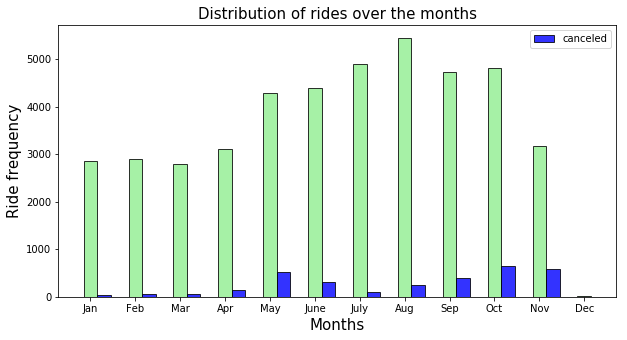

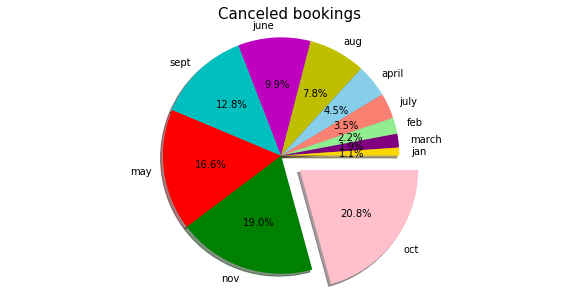

In [318]:
#Visually months over the year:
plt.figure(figsize=(10, 5))
_=plt.bar(month.index,month.values,width=0.3,color='lightgreen',edgecolor='k',alpha=0.8)
_=plt.bar(month_can.index+0.3,month_can.values,width=0.3,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Ride frequency',fontsize=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Distribution of rides over the months',fontsize=15)
plt.legend()
plt.savefig("20.png")
plt.show()


#visual-a:
#pie plot showing the distribution:

plt.figure(figsize=(10,5))
values = month_can.values
colors = ['pink', 'g', 'r', 'c', 'm', 'y','skyblue','salmon','lightgreen','purple','gold']
labels = ['oct','nov','may','sept','june','aug','april','july','feb','march','jan']
explode = (0.2, 0, 0, 0, 0, 0,0,0,0,0,0)
plt.pie(values, colors=colors, labels= labels,explode=explode,counterclock=False, autopct='%1.1f%%',shadow=True)
plt.title('Canceled bookings',fontsize=15)
#plt.legend(labels,loc=3)
plt.axis('equal')
plt.savefig("20a.png")
plt.show()

### 2.k.4) Distribution of the rides over the times in the days:

These are the frequencies of the rides across different times of the day. 
Clearly we can see the two humps/clusters in the distributions of the ride frequencies. So, what we see is that, the maximum rides are booked for two typical time stamps in a given day. One is around the morning and another for the evening time. Clearly these two are the busiest hours, or mostly what we call as the 'office time' rush' in a day. 

The ride cancellation distribution also follows the same trend. Maximum numbers of rides got canceled in these two peak hours. As obvious, these are the times, when rides can get canceled due to unavailability of cars.

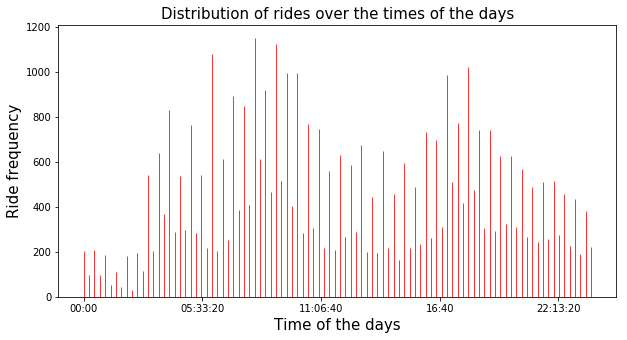

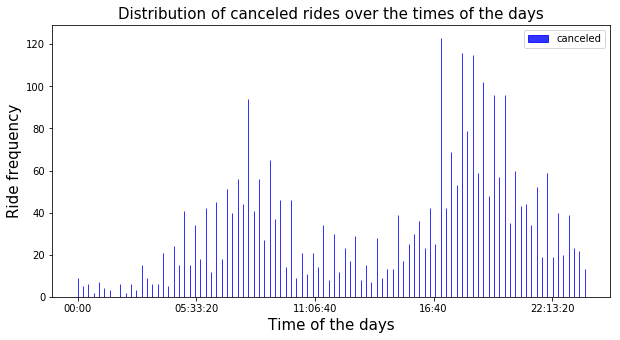

In [319]:
#Visually time of the day 
plt.figure(figsize=(10, 5))
_=plt.bar(t.index,t.values,color='g',alpha=0.8,width=0.2,edgecolor='r')
#_=plt.bar(t_can.index,t_can.values,width=0.2,color='b',edgecolor='k',alpha=0.8,label='canceled')
plt.xlabel('Time of the days',fontsize=15)
#plt.xticks(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Ride frequency',fontsize=15)
plt.title('Distribution of rides over the times of the days',fontsize=15)
#plt.legend()
plt.savefig("21.png")
plt.show()

#Visually time of the day 
plt.figure(figsize=(10, 5))
#_=plt.bar(t.index,t.values,color='g',alpha=0.8,width=0.2,edgecolor='r')
_=plt.bar(t_can.index,t_can.values,width=0.2,color='b',edgecolor='b',alpha=0.8,label='canceled')
plt.xlabel('Time of the days',fontsize=15)
#plt.xticks(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Ride frequency',fontsize=15)
plt.title('Distribution of canceled rides over the times of the days',fontsize=15)
plt.legend()
plt.savefig("21a.png")
plt.show()

### 2.l) Time difference (between the timestamp of booking time and the trip starting time) :

This is the numerical feature created, by taking the difference of the timestamps between the ‘booking created’ and the ‘trip start time’, to explore if that has any connection with the cancellations or not.  

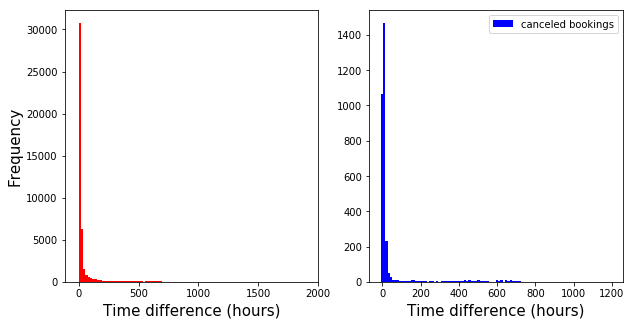

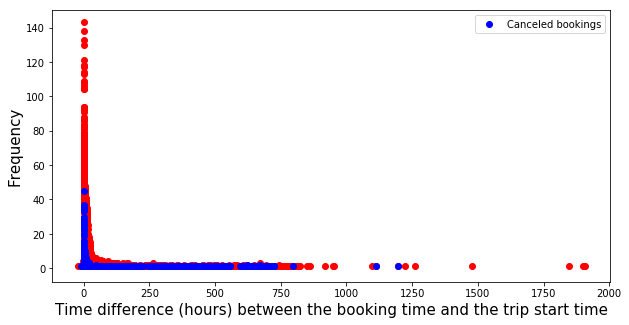

In [320]:
#Inspect if the time difference between the time of 
#booking and the time of trip strat has any impact on the cancellation:


import datetime as dt
end= df['from_date']
start=df['booking_created']
diff = (end - start) 
df['time_difference']= diff/np.timedelta64(1,'h')
#print(difference)

end_can= df1['from_date']
start_can=df1['booking_created']
diff_can = (end_can - start_can) 
df1['time_difference_can']= diff_can/np.timedelta64(1,'h')
#print(difference)

#Visually:
plt.figure(figsize=(10,5))
plt.subplot(121)
ax1=plt.hist(df['time_difference'],bins=100,color='r')
plt.xlabel('Time difference (hours)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

plt.subplot(122)
ax2=plt.hist(df1['time_difference_can'],bins=100,label='canceled bookings',color='b')
plt.xlabel('Time difference (hours)',fontsize=15)
#plt.ylabel('Frequency',fontsize=15)
plt.legend()
plt.savefig("22.png")
plt.show()

td=df.time_difference.value_counts()

td_can=df1.time_difference_can.value_counts()
plt.figure(figsize=(10,5))
_=plt.scatter(td.index,td.values,color='r')
_=plt.scatter(td_can.index,td_can.values,color='b',label='Canceled bookings')
plt.xlabel('Time difference (hours) between the booking time and the trip start time',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend()
plt.savefig("23.png")
plt.show()

#boxplots

#plt.figure(figsize=(10,5))
#plt.subplot(121)
#_= sns.boxplot(df['time_difference'],color='cyan',orient='v')
#plt.title('Time difference',fontsize=15)
#plt.subplot(122)
#_=sns.boxplot(td_can.index,color='coral',orient='v')
#plt.title('Time difference for canceled',fontsize=15)
#plt.savefig("24.png")
#plt.show()

In [323]:

# Numerical values of the time difference:

#average time difference:
#m1=np.min(df['time_difference'])

#print('The average time difference (hrs.) between the booking time and that of the trip start: ' +str(m1))

#average time difference for the canceled bookings:
#m2=np.mean(df1['time_difference_can'])
#print('The average time difference (hrs.) between the booking time and that of the trip start for canceled bookings : ' +str(m2))
#df.head()

df_n = df[df['time_difference'] < 0]
#df_n['Car_Cancellation']
#print(df_n['booking_created'])
#print(df_n['from_date'])
#print(len(df_n))

#df = df.drop(df[df.score < 50].index)
#df_new= df.drop(df[df.time_difference < 0].index, inplace=True)
#df.head()

### Some problem in the dataset:

We can see that in 42 entries of the dataset, the time difference (which is the difference in the datetime entries of ride booking and the actual trip start) is negative! This is unphysical, where you cannot book the ride, which has already initiated. Surprisingly, 41 of them are successful (not canceled.) 



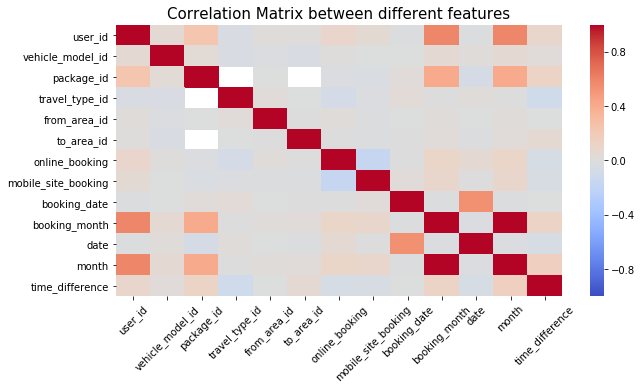

In [177]:
#Heatmap:

X = df[['Car_Cancellation']]
y = df[['user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id','online_booking','mobile_site_booking', 'booking_date','booking_month','booking_time','date','month','time','time_difference']]
y_cols = y.columns.tolist()
corr = df[y_cols].corr()

#sns.heatmap(corr)
plt.figure(figsize=(10,5))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap='coolwarm');
plt.xticks(rotation=45);
plt.title('Correlation Matrix between different features',fontsize=15);

### 3. Executive summary:

* The dataset contains 43431 entries and 20 columns which includes 18 features (all categorical).

* Only ~7% (3132, in total 43,431) of the total bookings has been canceled.

* Total 22267 user IDs have been recorded. The no. of one-time users (non returning) are: 15935 and that of the returning customers are: 6332. user with the user_id '29648' is the most frequent user, with frequency 471. He/she got the maximum cancellations too, 55 tmes.

* Package ID and travel type IDs are the different ride plans, which seems do not have much connection with the cancellations.

* 27 different types of vehicles have been listed. The most popular one is the vehicle with the vehicle ID no '12' (used 31859 times). The same vehicle ID ('12' )got the maximum number of cancellations (2668 times) as well.

* Total 1878 bookings have been done from the mobile websites, 15270 bookings from the desktop websites, so, 26283 bookings have been done differently. Maximum no. of cancellations correspond to the bookings done from the desktop websites.

* 598 unique origin and 568 destination area informations have been listed. 559 of them are common to both. The most popular origin area is the area with area_id no. '393', which is eventually the most popular destination area as well. There are certain pick-up and drop-off areas for which more than 50% of the bookings were canceled. And some routes (from certain pick-up to certain drop-off areas), for which more than 90% of bookings were canceled.

* Only 3 origin cities have been recorded. The most popular origin city is the city with the ID no: '15'. Where as, 116 unique destination cities are there. The most popular destination city is the city with the ID no: '32' (475 rides have their destinations to this city.)

* Booking timestamps show the date-time information, about when the booking has done. Maximum no. of bookings made at a given timestamp is, 18. The corresponding date-time is: 2013-10-31 10:30:00. Splitting the timestamp information in days/months and times reveal that, maximum bookings were done on the Fridays. And in the month of August.


* Record of the timestamp of the actual rides is one of the most important features in the dataset, which might show some connection with the cancellation. Maximum no. of trips started at a given timestamp is, 20 and the corresponding date-time is: 2013-10-12 06:00:00 and 2013-07-04 22:15:00.

* Extracted the ride frequencies over the days of the week. maximum no. of (6990) rides correspond to Saturday's, followed by the 'friday's. Where as the maximum cancellations(578) correspond to the 'friday's, followed by the 'sunday's.

*  Extracted the ride frequency over the months of the year. The maximum no. of rides(5445) correspond to the month of 'August'and followed by 'July'. Where as, the aximum cancellation (650) correspond to the 'October', followed by 'November'.

*  Two humps/clusters are there in the distributions of the ride frequencies over the time of the day. Maximum rides are booked for two typical time stamps in a given day: One is around the morning and another for the evening time. Clearly these two are the busiest hours, or mostly what we call as the 'office time' rush' in a day. The ride cancellation distribution also follows the same trend. Maximum numbers of rides got canceled in these two peak hours. As obvious, these are the times, when rides can get canceled due to unavailability of cars.

* Time-difference is a numerical feature, created by taking the difference between the timestamp corresponding to the booking time, and that of the actual trip start.

* There are 42 entries in the dataset, where the time-difference is negative. These seems unreal/ unphysical. However, surprisingly, 41 of them are successful bookings (not canceled.)